In [72]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [73]:
def bass_model(n0, na, p, q, t, dt):
    t_arr = np.arange(0, t+dt, dt)
    n_arr = 0 * t_arr
    bell = 0 * t_arr
    n_arr[0] = n0
    bell[0] = 0
    for i in range(1, len(t_arr)):
        n_arr[i] = n_arr[i-1] + (p*na + (q-p)*n_arr[i-1] - (q*n_arr[i-1]*n_arr[i-1])/na)*dt
        bell[i] = n_arr[i] - n_arr[i-1]
        
    maxbell = max(bell)
    index = bell.tolist().index(maxbell)
        
    return t_arr, n_arr, bell, index

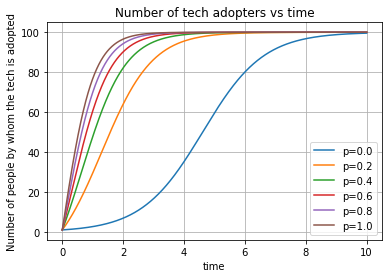

In [95]:
p_arr = np.arange(0.0, 1.2, 0.2)
q = 1
na = 100
t = 10
dt = 0.01
n0 = 1

plt.figure()
plt.grid()
plt.xlabel('time')
plt.ylabel('Number of people by whom the tech is adopted')
plt.title('Number of tech adopters vs time')
for p in p_arr:
    t_arr, n_arr, bell, index = bass_model(n0, na, p, q, t, dt)
    plt.plot(t_arr, n_arr)

plt.legend(['p=0.0','p=0.2','p=0.4','p=0.6','p=0.8','p=1.0'])
plt.savefig("p-vary.png")

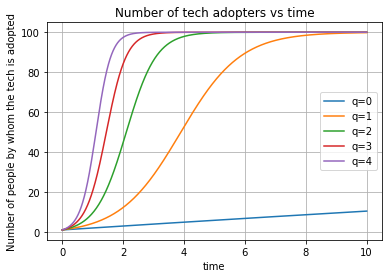

In [96]:
qarr = np.arange(0.0, 5, 1)
p = 0.01
na = 100
t = 10
dt = 0.01
n0 = 1

plt.figure()
plt.grid()
plt.xlabel('time')
plt.ylabel('Number of people by whom the tech is adopted')
plt.title('Number of tech adopters vs time')
for q in qarr:
    t_arr, n_arr, bell, index = bass_model(n0, na, p, q, t, dt)
    plt.plot(t_arr, n_arr)
    
plt.legend(['q=0','q=1','q=2','q=3','q=4'])
plt.savefig("q-vary.png")

In [78]:
def bass_mod(n0, na, p, q0, b, t, dt):
    t_arr = np.arange(0, t+dt, dt)
    n_arr = 0 * t_arr
    bell = 0 * t_arr
    n_arr[0] = n0
    bell[0] = 0
    for i in range(1, len(t_arr)):
        
        q = q0 * pow((n_arr[i-1]/na),b)
        n_arr[i] = n_arr[i-1] + ((p + q)*na - (p + q)*n_arr[i-1])*dt
        bell[i] = n_arr[i] - n_arr[i-1]
        
    maxbell = max(bell)
    index = bell.tolist().index(maxbell)
        
    return t_arr, n_arr, bell, index    

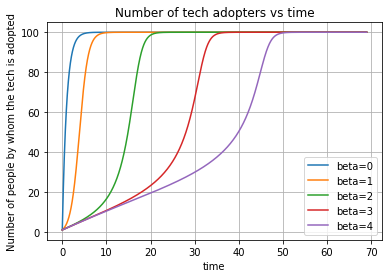

In [100]:
barr = np.arange(0, 5, 1)
p = 0.01
q0 = 1
na = 100
t = 69
dt = 0.01
n0 = 1

plt.figure()
plt.grid()
plt.xlabel('time')
plt.ylabel('Number of people by whom the tech is adopted')
plt.title('Number of tech adopters vs time')
for b in barr:
    t_arr, n_arr, bell, index = bass_mod(n0, na, p, q0, b, t, dt)
    plt.plot(t_arr, n_arr)

plt.legend(['beta=0','beta=1','beta=2','beta=3','beta=4'])
plt.savefig("b-vary.png")